In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("Churn Modeling.csv")
print(df.head())
print("Veri kümesinin boyutu:", df.shape)
print("Sınıf dağılımı:\n", df['Exited'].value_counts())
print(df.describe())
print(df.isnull().sum())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790


 Training with activation: TANH
 Time: 4.46 seconds
 Accuracy: 0.8595
 Log Loss: 0.3428
 Precision: 0.7128
 Recall: 0.5184
 F1-Score: 0.6003

 Confusion Matrix (Numeric):
[[1508   85]
 [ 196  211]]

 Classification Report:
              precision    recall  f1-score   support

           0     0.8850    0.9466    0.9148      1593
           1     0.7128    0.5184    0.6003       407

    accuracy                         0.8595      2000
   macro avg     0.7989    0.7325    0.7575      2000
weighted avg     0.8499    0.8595    0.8508      2000



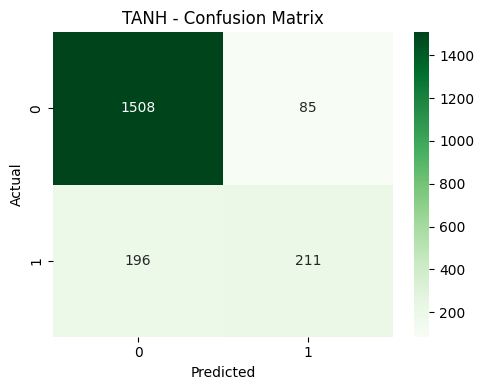

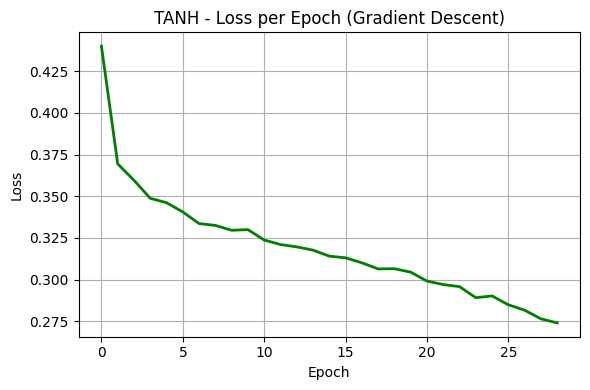


 Training with activation: LOGISTIC
 Time: 15.52 seconds
 Accuracy: 0.8590
 Log Loss: 0.3440
 Precision: 0.7637
 Recall: 0.4447
 F1-Score: 0.5621

 Confusion Matrix (Numeric):
[[1537   56]
 [ 226  181]]

 Classification Report:
              precision    recall  f1-score   support

           0     0.8718    0.9648    0.9160      1593
           1     0.7637    0.4447    0.5621       407

    accuracy                         0.8590      2000
   macro avg     0.8178    0.7048    0.7390      2000
weighted avg     0.8498    0.8590    0.8440      2000



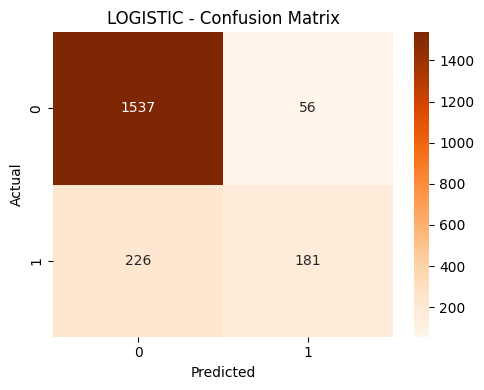

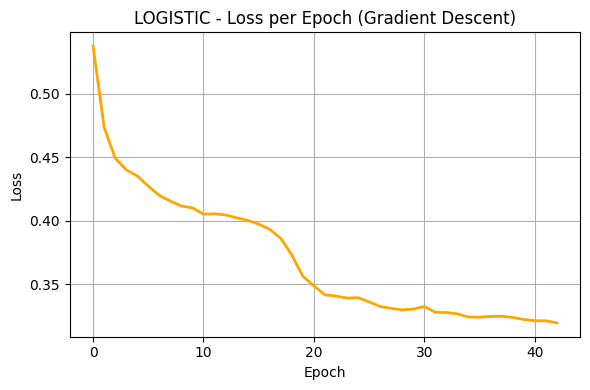


 Training with activation: RELU
 Time: 2.56 seconds
 Accuracy: 0.8555
 Log Loss: 0.3498
 Precision: 0.7360
 Recall: 0.4521
 F1-Score: 0.5601

 Confusion Matrix (Numeric):
[[1527   66]
 [ 223  184]]

 Classification Report:
              precision    recall  f1-score   support

           0     0.8726    0.9586    0.9136      1593
           1     0.7360    0.4521    0.5601       407

    accuracy                         0.8555      2000
   macro avg     0.8043    0.7053    0.7368      2000
weighted avg     0.8448    0.8555    0.8416      2000



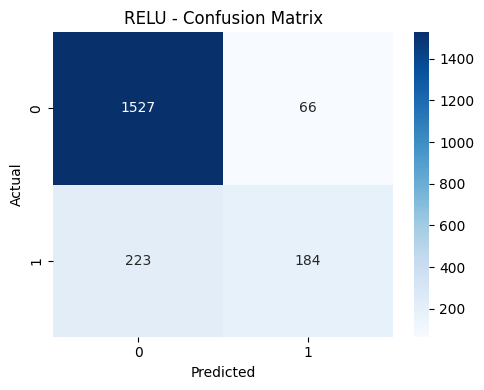

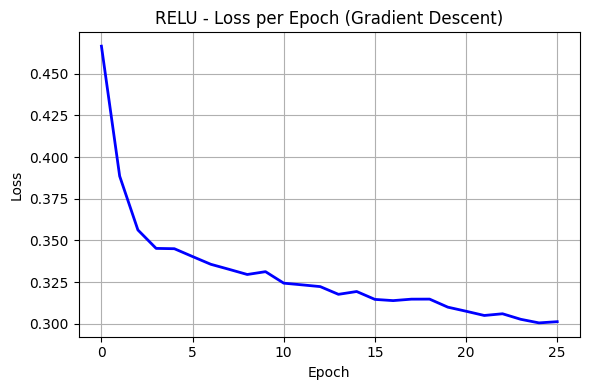


 Summary of Results:
  activation  accuracy      loss  precision    recall  f1_score       time
0       tanh    0.8595  0.342762   0.712838  0.518428  0.600284   4.457916
1   logistic    0.8590  0.343969   0.763713  0.444717  0.562112  15.519634
2       relu    0.8555  0.349760   0.736000  0.452088  0.560122   2.563432


C:\Users\gorke\AppData\Local\Temp\ipykernel_6096\3202173909.py:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='activation', y='accuracy', data=df_results, palette='viridis')


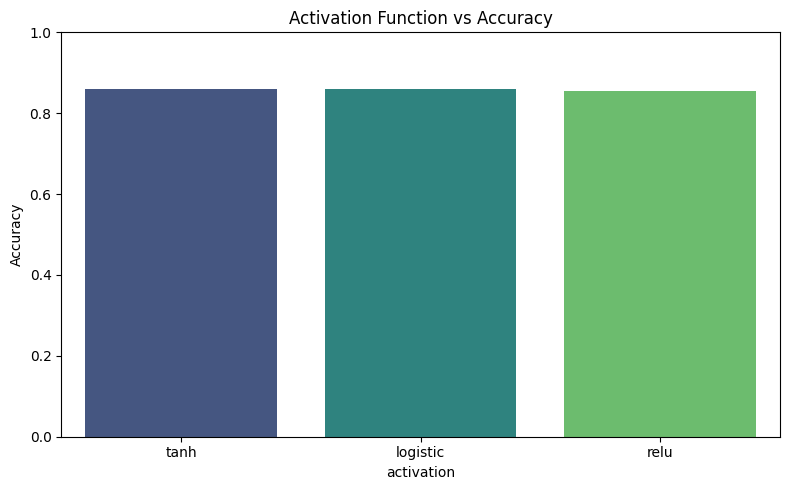

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, log_loss, precision_score, recall_score, f1_score, classification_report

df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
label_enc = LabelEncoder()
df['Gender'] = label_enc.fit_transform(df['Gender']) 
df['Geography'] = label_enc.fit_transform(df['Geography'])
X = df.drop('Exited', axis=1)
y = df['Exited']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)
def train_and_visualize(activation, cmap='Blues', line_color='blue'):
    print(f"\n Training with activation: {activation.upper()}")
    
    model = MLPClassifier(
        hidden_layer_sizes=(64, 32),
        activation=activation,
        solver='adam',
        max_iter=500,
        learning_rate_init=0.01,
        early_stopping=True,
        n_iter_no_change=20,
        random_state=42,
        verbose=False
    )
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)

    acc = accuracy_score(y_test, y_pred)
    loss = log_loss(y_test, y_prob)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    duration = end_time - start_time
    conf = confusion_matrix(y_test, y_pred)

    print(f" Time: {duration:.2f} seconds")
    print(f" Accuracy: {acc:.4f}")
    print(f" Log Loss: {loss:.4f}")
    print(f" Precision: {prec:.4f}")
    print(f" Recall: {rec:.4f}")
    print(f" F1-Score: {f1:.4f}")

    print("\n Confusion Matrix (Numeric):")
    print(conf)

    print("\n Classification Report:")
    print(classification_report(y_test, y_pred, digits=4))

    plt.figure(figsize=(5, 4))
    sns.heatmap(conf, annot=True, fmt='d', cmap=cmap)
    plt.title(f'{activation.upper()} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(6, 4))
    plt.plot(model.loss_curve_, color=line_color, linewidth=2)
    plt.title(f'{activation.upper()} - Loss per Epoch (Gradient Descent)')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    return {
        'activation': activation,
        'accuracy': acc,
        'loss': loss,
        'precision': prec,
        'recall': rec,
        'f1_score': f1,
        'time': duration
    }
results = []
results.append(train_and_visualize('tanh', cmap='Greens', line_color='green'))
results.append(train_and_visualize('logistic', cmap='Oranges', line_color='orange'))
results.append(train_and_visualize('relu', cmap='Blues', line_color='blue'))

df_results = pd.DataFrame(results)
print("\n Summary of Results:")
print(df_results.sort_values(by='accuracy', ascending=False))
plt.figure(figsize=(8, 5))
sns.barplot(x='activation', y='accuracy', data=df_results, palette='viridis')
plt.title('Activation Function vs Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()
